In [94]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
cancer = pd.read_csv(fileURL, names=['id', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 
                                   'marginal_adhesion', 'SE_cell_size', 'bare_nuclei', 'bland_chromatin',
                                  'normal_nucleoli', 'mitoses', 'class'], header=None)

Populating the interactive namespace from numpy and matplotlib


In [95]:
cancer.bare_nuclei = cancer.bare_nuclei.replace('?', 1)
cancer.bare_nuclei = cancer.bare_nuclei.astype(int)
cancer.dtypes

id                       int64
clump_thickness          int64
uniformity_cell_size     int64
uniformity_cell_shape    int64
marginal_adhesion        int64
SE_cell_size             int64
bare_nuclei              int64
bland_chromatin          int64
normal_nucleoli          int64
mitoses                  int64
class                    int64
dtype: object

### Recode the class label: 0-benign, 1-malignant

In [96]:
cancer['class'] = cancer['class'].replace(2, 0)
cancer['class'] = cancer['class'].replace(4, 1)
cancer.head()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,SE_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


### The data is relatively balanced. So I am going to go ahead with the standard split to create training and testing data sets.

In [97]:
cancer['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

In [98]:
data = cancer.iloc[:,1:10]
data.head()
data = data.as_matrix()

In [99]:
label = cancer['class']
label = label.as_matrix()

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)

In [101]:
type(X_train)

numpy.ndarray

In [102]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

## The accuracy of the decision tree model on the test data is 0.957. It means that the model predicts 95.7% of the instances in the test dataset correctly. This is one sign indicating that the model is performing well.

In [104]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.95714285714285718

## The precision score of the model on the test data is 0.939. It means that among the instances that model predicts as positive, 93.9% of them are actually positive. This is another sign indicating that the model is working great. 

In [107]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.93939393939393945

## The recall score of the model on the test data is 0.925. It means that among the instances that are actually positive, 92.5% of them are predicted as positive by the model. This is one more sign suggesting that the model is a good one.

In [108]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.92537313432835822

## Classification report

In [126]:
from sklearn.metrics import classification_report
target_names = ['benign', 'malignant']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     benign       0.97      0.97      0.97       143
  malignant       0.94      0.93      0.93        67

avg / total       0.96      0.96      0.96       210



## Confusion matrix: class of 1 is considered as positive. Number of instances in each group: TP-62, TN-139, FP-4, FN-5.

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[139,   4],
       [  5,  62]])

## Plot the ROC curve: the curve covers the top left area in the plot, suggesting that the model behaves better than random guess. The area under the curve is 0.9525, which is really close to 1. This indicates that the model is performing great.

In [121]:
from sklearn.metrics import roc_curve, auc
y_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score)

In [122]:
fpr

array([ 0.        ,  0.01398601,  0.02797203,  0.04895105,  1.        ])

In [123]:
tpr

array([ 0.        ,  0.79104478,  0.92537313,  0.92537313,  1.        ])

In [124]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9525101763907734

In [125]:
threshold

array([ 2.        ,  1.        ,  0.8       ,  0.16666667,  0.        ])

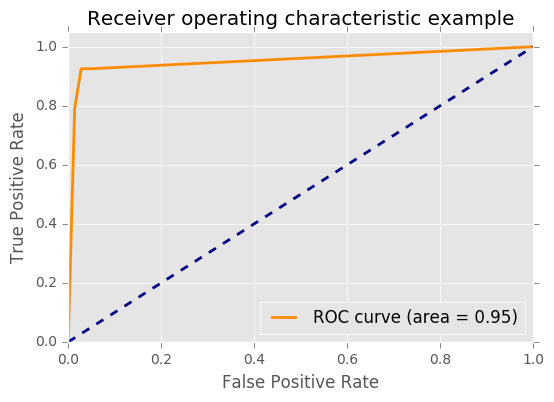

In [115]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Plot the precision-recall curve: the area under the curve is 0.95, which is really close to 1. Another sign indicating that the model is performing great.

In [116]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, _ = precision_recall_curve(y_test, y_score)

In [117]:
precision

array([ 0.31904762,  0.89855072,  0.93939394,  0.96363636,  1.        ])

In [118]:
recall

array([ 1.        ,  0.92537313,  0.92537313,  0.79104478,  0.        ])

In [119]:
average_precision = average_precision_score(y_test, y_score)
average_precision

0.94991038595840682

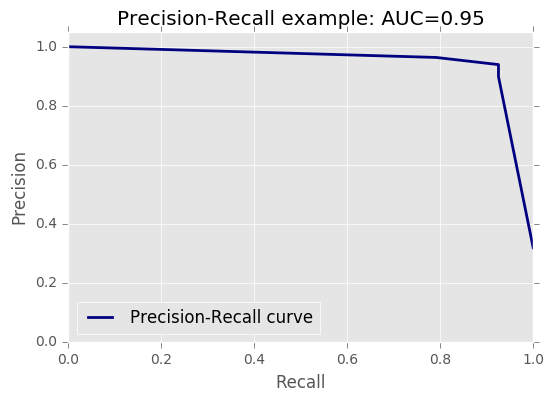

In [120]:
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()